In [2]:
import matplotlib.pyplot as plt 
import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

merged_data = pd.read_excel('E:\Projet 2023\Data\Output\Micheal\Micheal_merged.xlsx')

print(merged_data.shape)

(18, 999)


In [3]:
merged_data.fillna(0,inplace = True)
merged_data_transposed = merged_data.transpose()
print(merged_data_transposed)

        0      1      2       3      4      5      6      7      8    9    10  \
0    62.44  59.26  59.26   59.26  59.26  59.26   0.00   0.00   0.00  0.0  0.0   
1    71.62  73.12  67.04   60.75  60.75  60.75   0.00   0.00   0.00  0.0  0.0   
2    71.10  70.39  70.39   70.39  70.39  70.39   0.00   0.00   0.00  0.0  0.0   
3    64.74  73.51  73.51   73.51  73.51  73.51   0.00   0.00   0.00  0.0  0.0   
4    82.62  72.98  79.20   84.72  84.72  84.72   0.00   0.00   0.00  0.0  0.0   
..     ...    ...    ...     ...    ...    ...    ...    ...    ...  ...  ...   
994  96.24  79.78  86.10  103.12  93.60  93.60  93.60  93.60  93.60  0.0  0.0   
995  91.84  84.39  78.61  103.02  84.56  78.39  78.39  78.39  78.39  0.0  0.0   
996  94.33  86.56  90.42   96.51  96.51  96.51  96.51  96.51  96.51  0.0  0.0   
997  85.70  91.19  77.48   83.58  74.42  82.61  82.61  82.61  82.61  0.0  0.0   
998  93.74  90.29  99.95   99.95  99.95  99.95  99.95  99.95  99.95  0.0  0.0   

      11   12   13   14   1

In [4]:

#print('Merged data before PCA',merged_data)
# Apply PCA on the original data
pca  = PCA()
merged_data_pca = pca.fit_transform(merged_data_transposed)

# # Calculate singular values
# singular_values = pca.singular_values_

# # Calculate eigenvalues using singular values
# eigenvalues = (singular_values ** 2) / (merged_data.shape[0] - 1)

# # Determine the optimal number of components using Kaiser criterion
# optimal_num_components = np.sum(eigenvalues > 1)
# print(optimal_num_components)
# # Apply PCA with the optimal number of components
# pca = PCA(n_components=optimal_num_components)
# merged_data_pca = pca.fit_transform(merged_data)


# # Apply PCA with the optimal number of components
# pca = PCA(n_components=optimal_num_components)
# merged_data_pca = pca.fit_transform(merged_data)

print(merged_data_pca.shape)

(999, 18)


In [7]:
print(merged_data_pca)

[[-9.23955552e+01  3.20809897e+01 -4.13771770e+01 ...  3.60420656e-15
   8.81603048e-15  6.06466362e-15]
 [-8.87818051e+01  2.99294376e+01 -3.91262489e+01 ... -1.32034461e-14
  -4.09276890e-15 -5.42865005e-16]
 [-8.57572324e+01  2.80627809e+01 -3.65877184e+01 ... -5.98441855e-15
   7.17816246e-15  3.77822723e-15]
 ...
 [ 6.66400746e+01 -3.91064177e+01  8.00681737e+00 ...  8.09442689e-16
  -1.70938439e-16  1.11502405e-16]
 [ 3.99361246e+01 -2.64272329e+01 -2.32917102e+00 ...  1.01493197e-15
  -1.52985920e-16  5.58045069e-16]
 [ 7.39202767e+01 -4.26778179e+01  1.09613726e+01 ... -7.60206935e-18
  -5.37692022e-16 -3.25543085e-16]]


C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

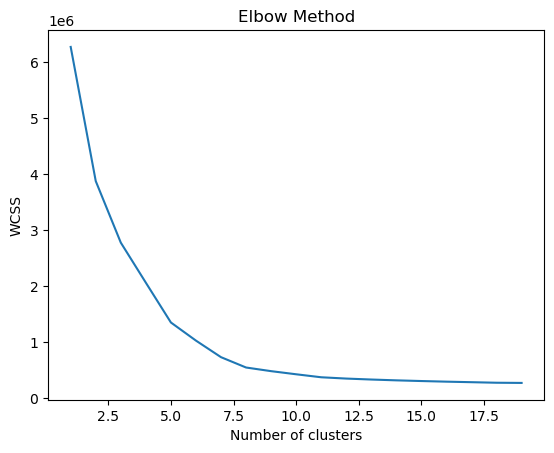

In [8]:
wcss = []
# merged_data = merged_data.values.reshape(-1, 1)
for k in range(1,20):
    kmeans = KMeans(n_clusters = k , random_state = 0)
    kmeans.fit(merged_data_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
n_clusters = 8
kmeans = KMeans(n_clusters = n_clusters,random_state = 40)
kmeans.fit(merged_data_pca[:,:2])
cluster_labels = kmeans.labels_
print(cluster_labels)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1
 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 6 6 6
 6 6 6 6 6 3 3 6 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 3 6 6 6 6 6 6 6 3 3
 6 6 6 6 6 6 6 6 6 6 6 6 6 3 6 3 6 6 6 3 3 3 6 3 3 6 6 6 3 6 6 3 6 6 6 6 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 5 5 5
 2 2 5 5 5 2 2 5 5 2 5 2 5 2 5 5 2 5 2 5 5 2 2 5 5 2 2 2 5 2 5 5 5 5 5 2 5
 5 2 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 2 2 5 1 1 1 6 1 6 1
 1 1 1 1 1 1 1 6 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [6]:
merged_columns = []
columns_lengths = []
root_path  = r'E:\Projet 2023\Data\Output\Micheal'
for file_name in os.listdir(root_path):
    if file_name.endswith('output.xlsx'):
        file_path = os.path.join(root_path,file_name)
        df = pd.read_excel(file_path)
        columns_lengths.append(len(df.columns))

print('Length of columns of each file ',columns_lengths)


Length of columns of each file  [65, 80, 77, 73, 68, 69, 21, 57, 68, 73, 77, 48, 65, 73, 85]


<Figure size 1000x600 with 0 Axes>

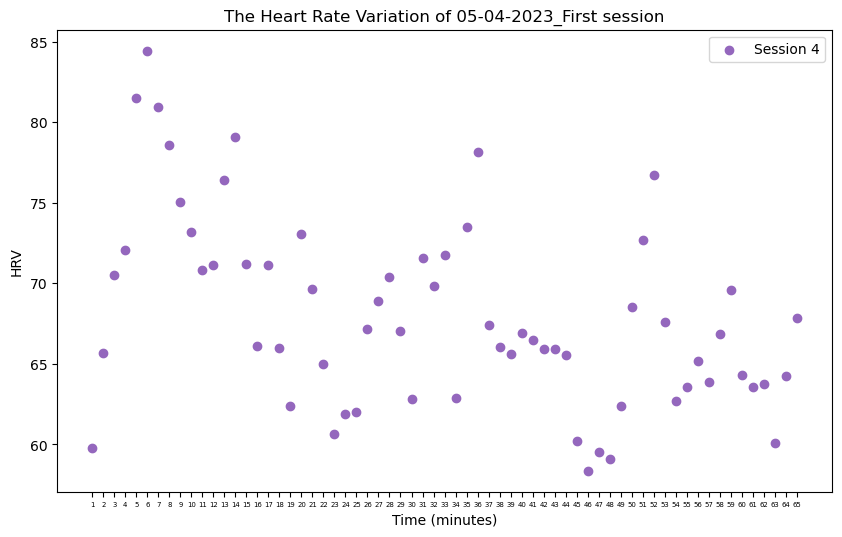

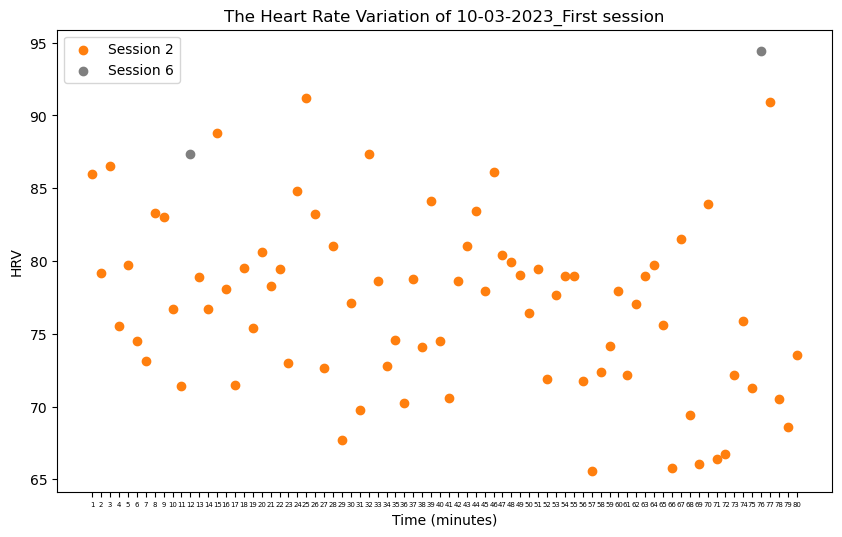

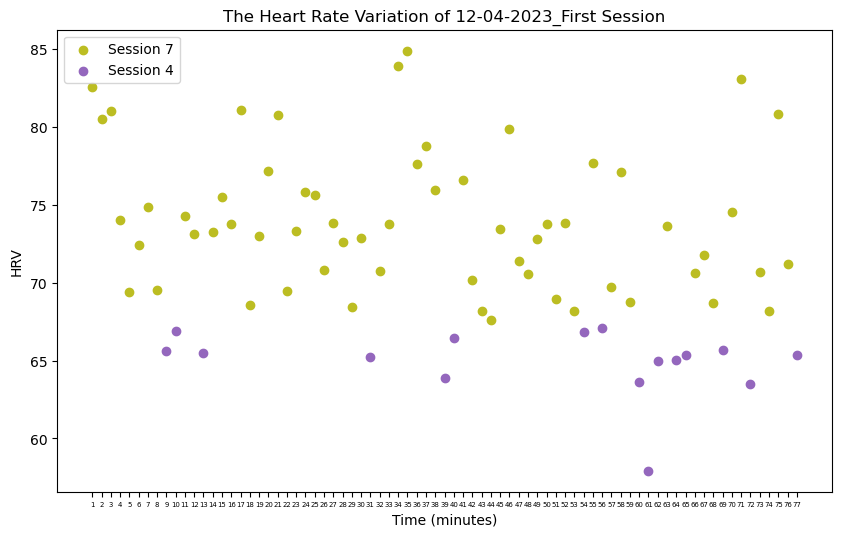

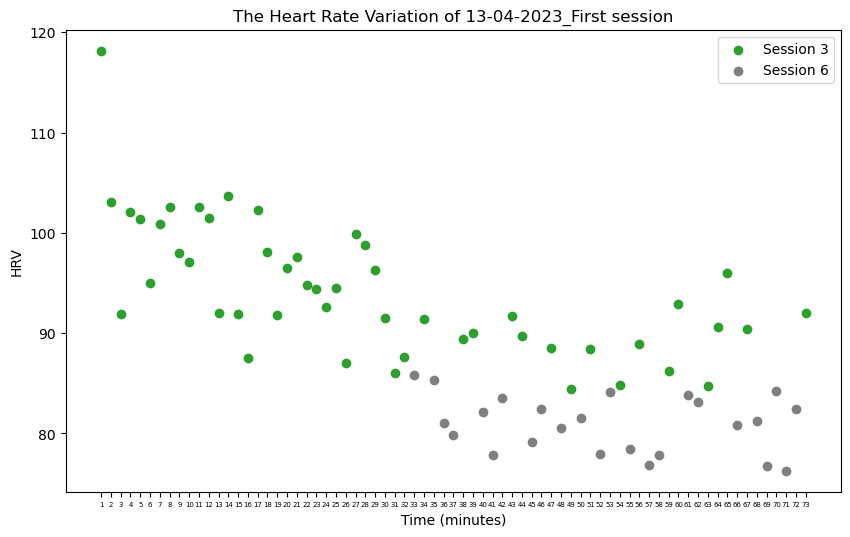

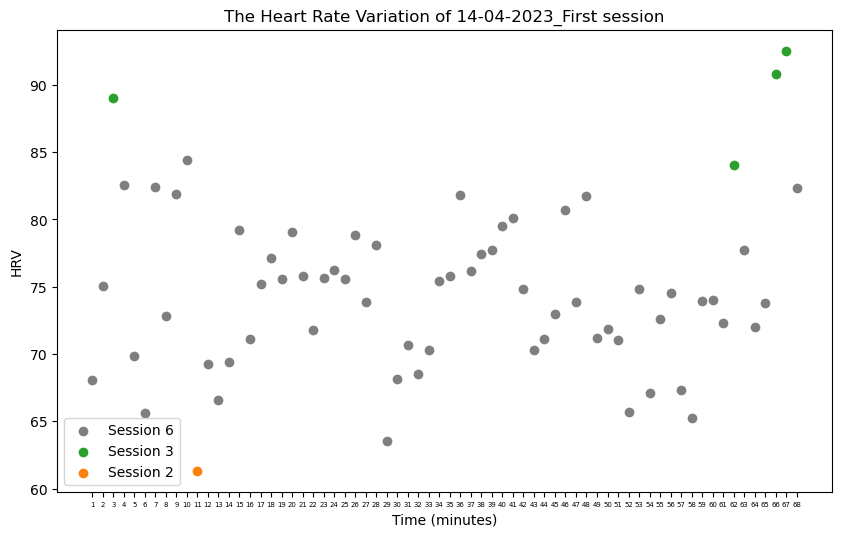

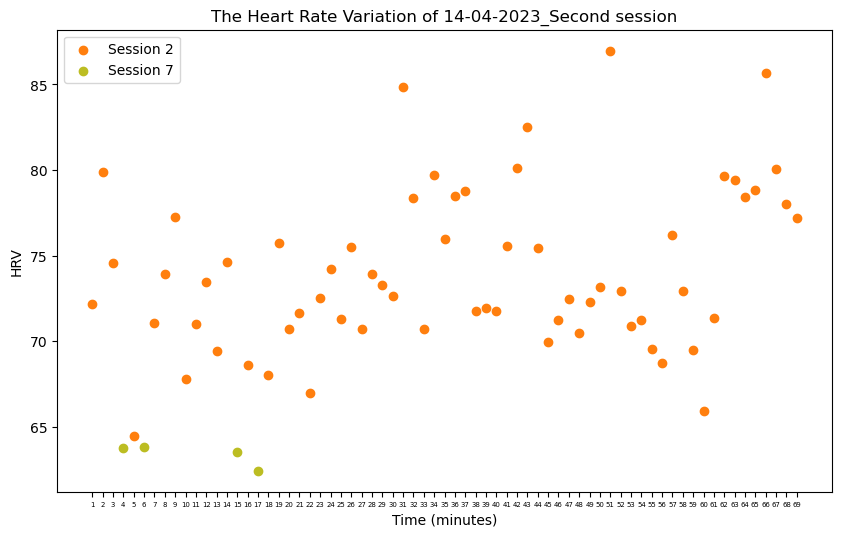

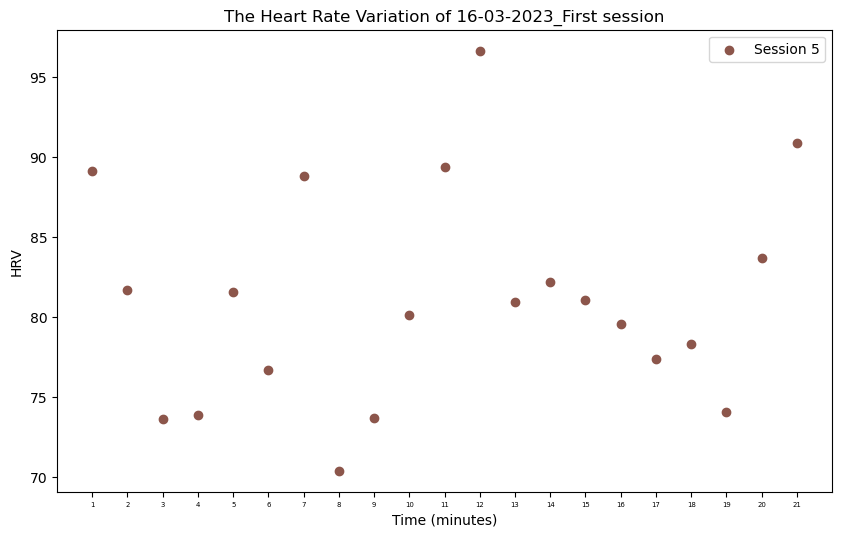

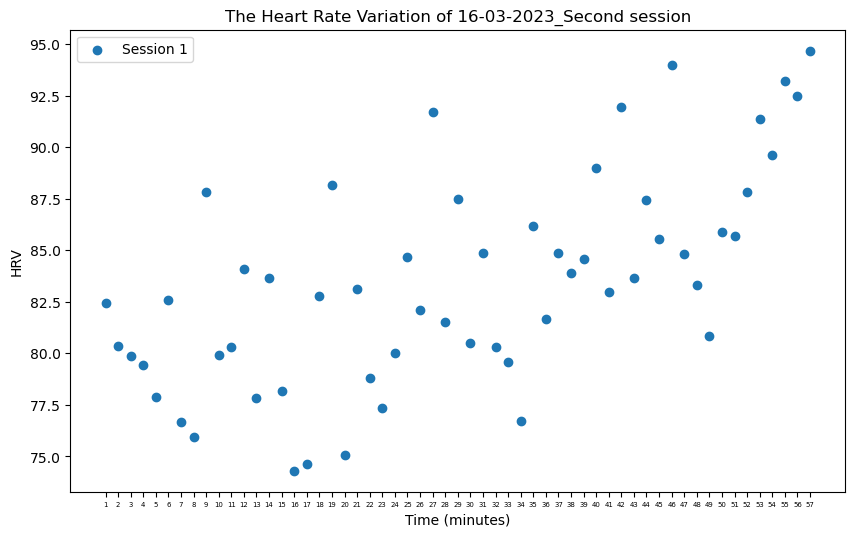

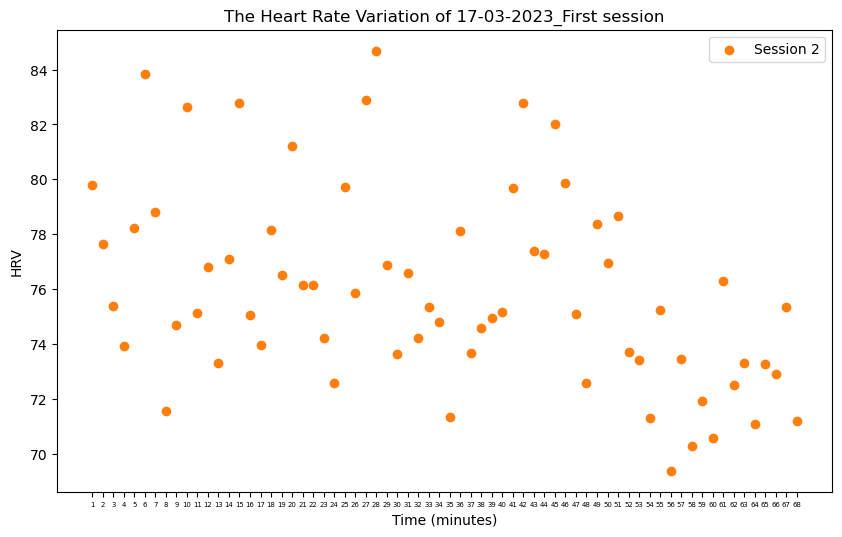

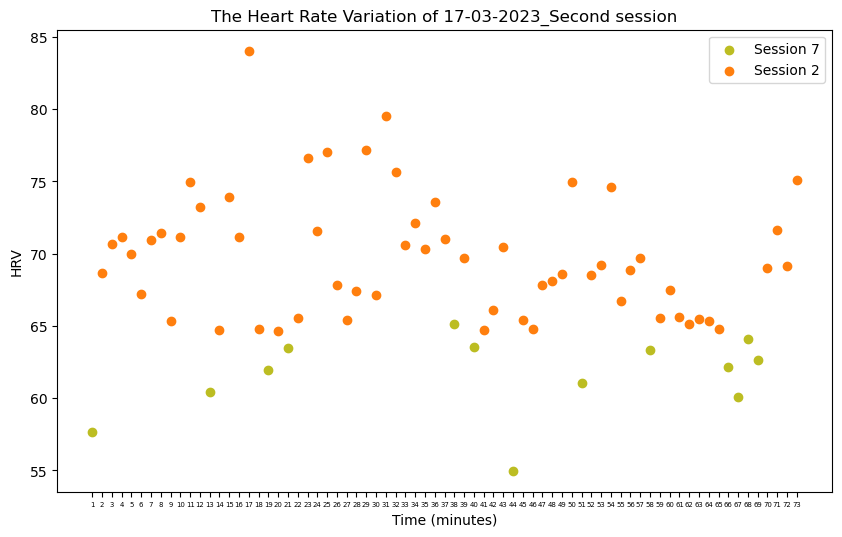

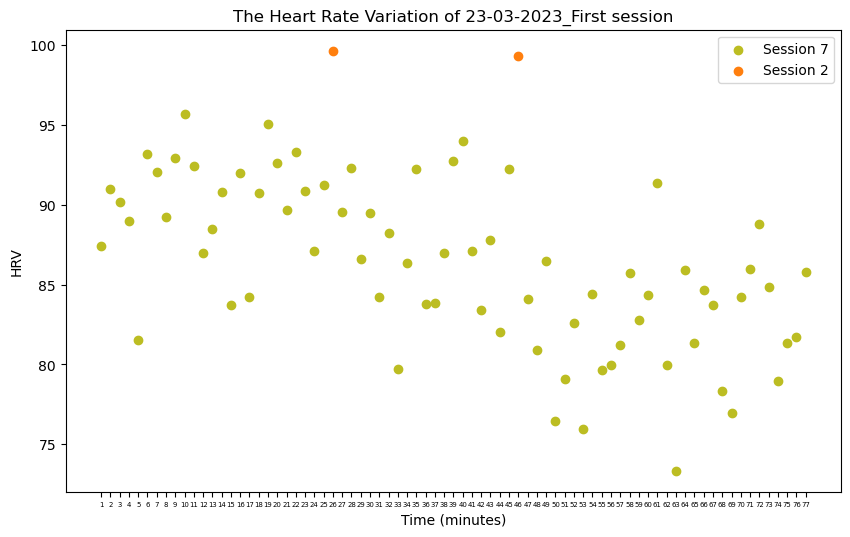

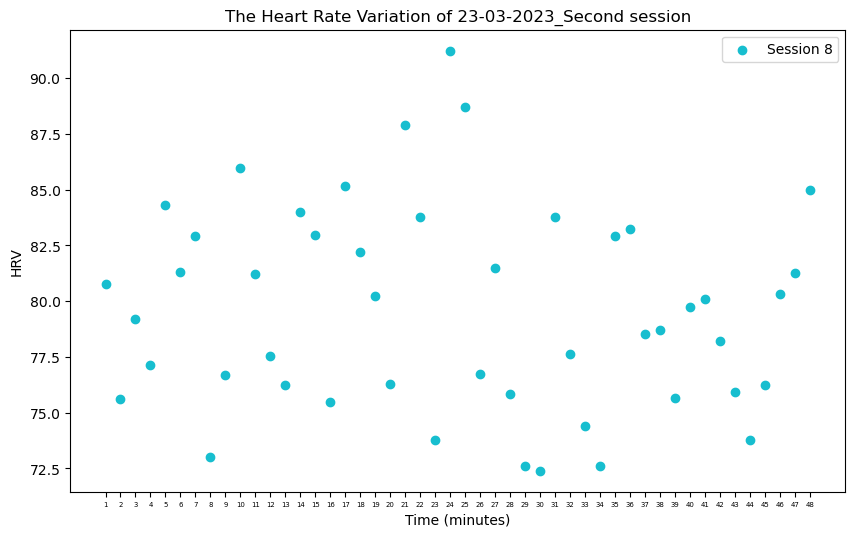

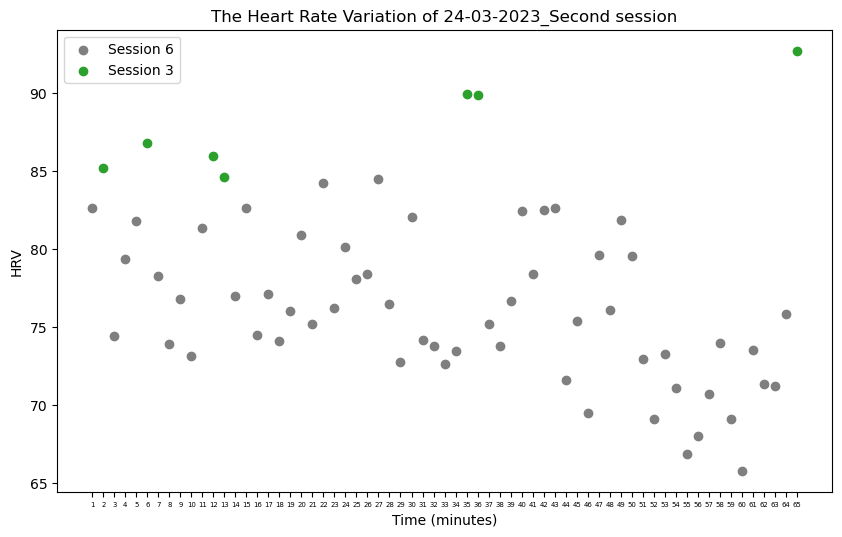

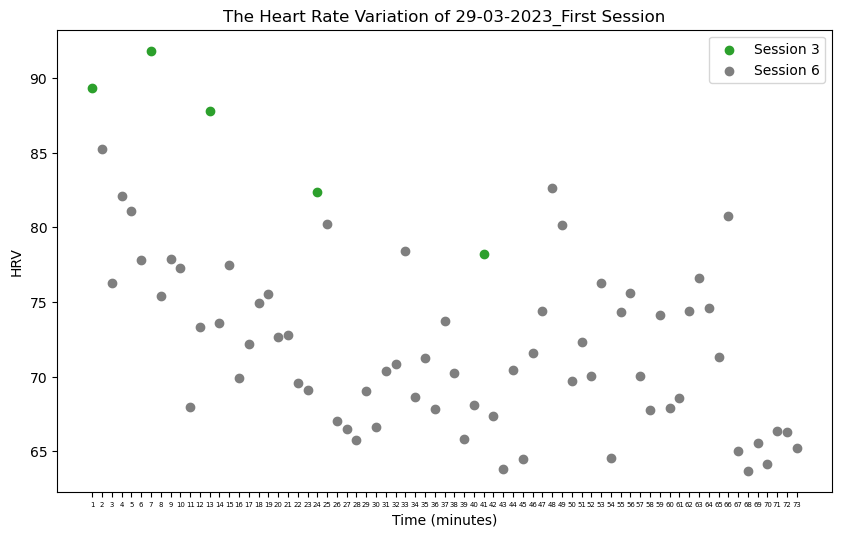

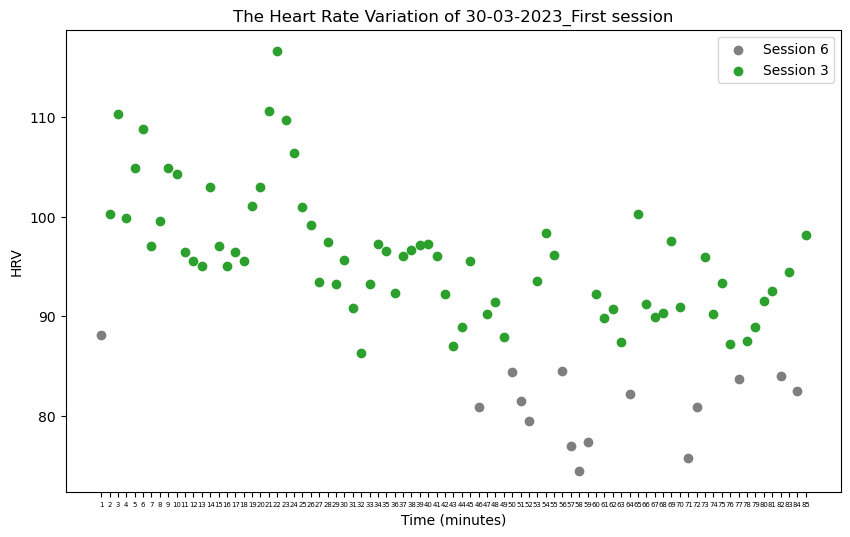

In [7]:
# Determine the number of columns
num_columns = merged_data.shape[1]

# Determine the maximum length of columns
max_length = max(columns_lengths)

# Get unique cluster labels
unique_labels = np.unique(cluster_labels)

# Create a colormap for the clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

# Plotting
plt.figure(figsize=(10, 6))

# Set the x-axis ticks and labels
x_ticks = range(1, max(columns_lengths) + 1)
x_tick_labels = [str(x) for x in x_ticks]

# Create an empty list to store legend handles

# Loop through each number of columns and plot
i = 0
for file_name in os.listdir(root_path):
    label_legend_mapping = {}
    if file_name.endswith('output.xlsx'):
        file_path = os.path.join(root_path,file_name)
        df = pd.read_excel(file_path)
        plt.figure(figsize = (10,6))
        for idx,column in enumerate(df.columns):
            label = cluster_labels[i + idx]
            x = idx + 1
            y = df[column].mean()
            plt.scatter(x,y,color = colors[label])
            if label not in label_legend_mapping:
                label_legend_mapping[label] = plt.scatter([], [], color=colors[label], label=f'Session {label+1}')
        
        plt.xticks(np.arange(1,len(df.columns) + 1),fontsize = 5)
        plt.xlabel('Time (minutes)')
#         plt.ylim([60,105])
        plt.ylabel('HRV')
         # Add a legend using the stored legend handles
        plt.legend(handles=label_legend_mapping.values())
        title = file_name.split('_')[0] + '_' + file_name.split('_')[1]
        plt.title(f'The Heart Rate Variation of {title}')
        output_path = os.path.join('E:\Projet 2023\Data\Cluster',f'{title}.jpg')
        plt.savefig(output_path,bbox_inches='tight',dpi = 300)
        plt.show()
        
        #Update the index
        i += len(df.columns)

In [8]:
# PART WITH FEATURES OF EACH COLUMNS

In [16]:
merged_data = pd.read_excel('E:\Projet 2023\Data\Output\Micheal\Micheal_merged.xlsx')
df_features = pd.DataFrame(columns = merged_data.columns)
labels = ['Median','Average', 'Std', 'Energy','min', 'max']
df_features.insert(0,' ', labels)
print(df_features.columns[1:])
values = []
for column in merged_data.columns:
    col_data = merged_data[column]
    values.append([col_data.median(skipna = True),np.mean(col_data),np.std(col_data),np.sum(np.square(col_data)),np.min(col_data),np.max(col_data)])
for i,col in enumerate(df_features.columns[1:]):
        df_features[col] = values[i]
print(df_features)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998],
      dtype='object', length=999)
                       0             1             2             3  \
0   Median     59.260000     63.895000     70.390000     73.510000   
1  Average     59.790000     65.671667     70.508333     72.048333   
2      Std      1.185116      5.250414      0.264601      3.268386   
3   Energy  21457.491600  26042.007900  29828.970500  31209.868100   
4      min     59.260000     60.750000     70.390000     64.740000   
5      max     62.440000     73.120000     71.100000     73.510000   

              4             5             6             7             8  ...  \
0     83.670000     84.720000     81.100000     78.350000     75.390000  ...   
1     81.493333     84.445000     80.968333     78.583333     75.081667  ...   
2      4.286407      0.614919      0.294416      0.521749      0.481817  ...   
3  39957.220000  42788.016900

In [18]:
df_features_transposed = df_features.transpose()
print(df_features_transposed)

          0          1         2           3      4       5
     Median    Average       Std      Energy    min     max
0     59.26      59.79  1.185116  21457.4916  59.26   62.44
1    63.895  65.671667  5.250414  26042.0079  60.75   73.12
2     70.39  70.508333  0.264601  29828.9705  70.39    71.1
3     73.51  72.048333  3.268386  31209.8681  64.74   73.51
..      ...        ...       ...         ...    ...     ...
994    93.6  92.582222  6.105731  77478.7304  79.78  103.12
995   78.61  83.997778  8.018258  64079.2722  78.39  103.02
996   96.51  94.485556  3.398654  80451.6395  86.56   96.51
997   82.61  82.534444  4.440308  61484.8577  74.42   91.19
998   99.95  98.186667   3.39764  86869.4892  90.29   99.95

[1000 rows x 6 columns]


In [19]:
pca = PCA()
df_features_pca = pca.fit_transform(df_features_transposed.iloc[1:,:])
print(df_features_pca.shape)

(999, 6)


C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

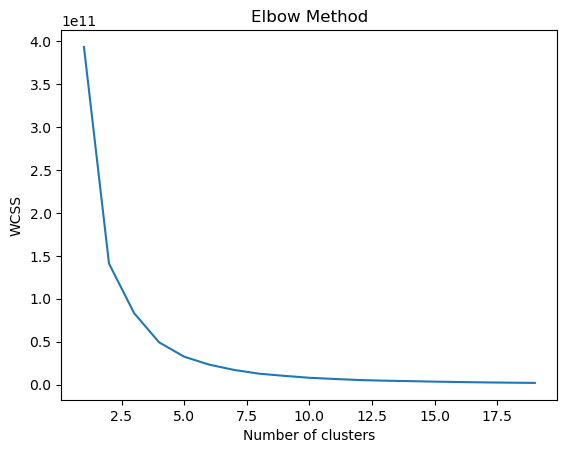

In [12]:
wcss = []
# merged_data = merged_data.values.reshape(-1, 1)
for k in range(1,20):
    kmeans = KMeans(n_clusters = k , random_state = 0)
    kmeans.fit(df_features_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
n_clusters = 8
kmeans = KMeans(n_clusters = n_clusters,random_state = 40)
kmeans.fit(df_features_pca)
cluster_labels = kmeans.labels_
print(cluster_labels)

[7 7 7 7 0 0 0 0 7 7 7 7 7 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 7 7 7 7 7 7 7 7 7 7 7 7 7 5 3 5 3 3 0 0 5 5
 3 0 5 3 3 5 3 0 3 3 3 3 3 0 5 5 5 0 3 0 3 0 5 3 0 0 0 3 0 5 0 0 3 3 5 3 5
 3 3 3 3 3 0 3 3 3 0 7 0 0 3 0 3 3 3 3 7 3 0 7 5 0 0 0 3 0 1 5 0 0 0 3 3 3
 0 7 0 0 7 7 7 0 0 7 0 0 0 3 7 0 0 3 7 0 0 0 7 0 0 7 0 7 7 0 3 3 0 0 0 7 7
 0 7 7 7 0 0 0 7 0 0 7 0 7 7 0 7 7 0 7 7 7 7 0 7 7 7 0 7 7 0 3 7 7 7 3 0 7
 4 2 1 2 2 1 2 2 2 2 2 2 1 2 1 1 2 2 1 2 2 1 1 1 1 1 2 2 2 1 5 1 5 1 5 5 5
 1 1 5 3 5 1 1 5 5 1 5 5 5 1 3 5 5 5 1 3 3 5 1 5 5 5 1 2 5 1 5 3 5 3 5 1 0
 3 1 5 0 0 5 3 5 5 7 0 0 0 5 3 3 3 3 5 3 3 3 3 3 5 3 5 0 0 0 0 0 3 3 5 3 3
 3 5 5 3 0 3 3 5 3 5 3 3 3 0 3 0 3 3 0 0 3 3 3 5 3 3 3 1 1 5 0 3 0 7 7 7 0
 0 3 0 0 0 0 0 7 0 7 0 3 0 0 0 0 0 0 3 0 0 0 0 5 3 0 3 3 3 3 0 0 0 3 3 3 3
 0 0 0 0 0 0 5 0 0 0 0 0 3 0 0 7 0 3 3 3 3 5 3 3 3 6 4 2 2 4 4 6 2 2 4 6 6
 4 4 4 4 4 4 2 4 6 1 1 1 1 5 1 5 5 2 1 1 1 5 1 5 5 5 1 2 5 1 1 5 1 1 1 2 1
 2 1 1 1 1 5 2 1 1 1 1 2 

C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [21]:
merged_columns = []
columns_lengths = []
root_path  = r'E:\Projet 2023\Data\Output\Micheal'
for file_name in os.listdir(root_path):
    if file_name.endswith('output.xlsx'):
        file_path = os.path.join(root_path,file_name)
        df = pd.read_excel(file_path)
        columns_lengths.append(len(df.columns))

print('Length of columns of each file ',columns_lengths)

Length of columns of each file  [65, 80, 77, 73, 68, 69, 21, 57, 68, 73, 77, 48, 65, 73, 85]


<Figure size 1000x600 with 0 Axes>

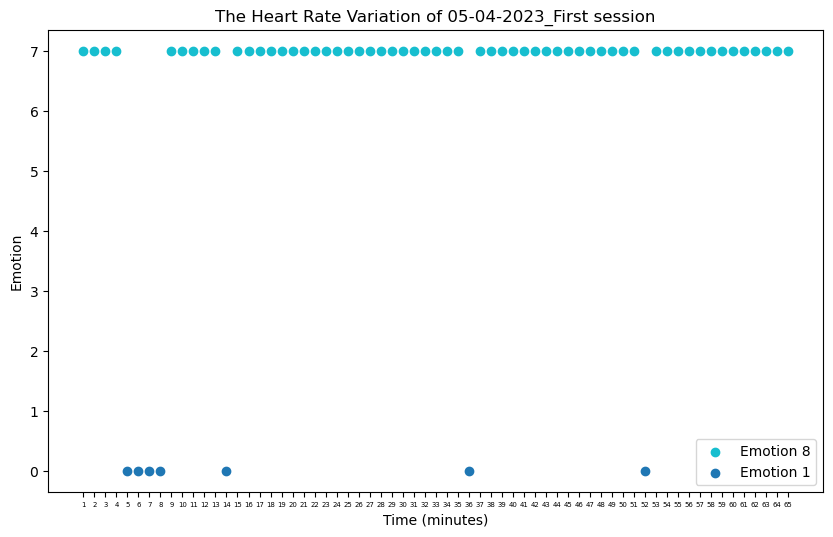

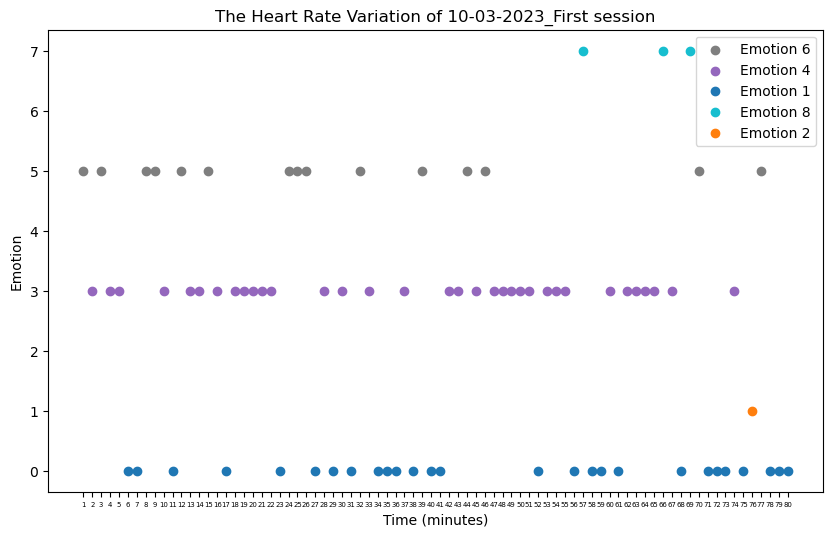

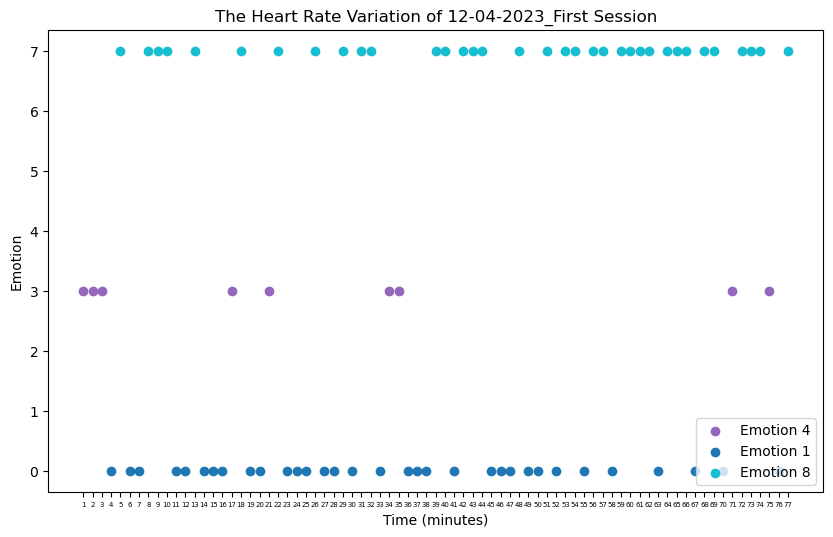

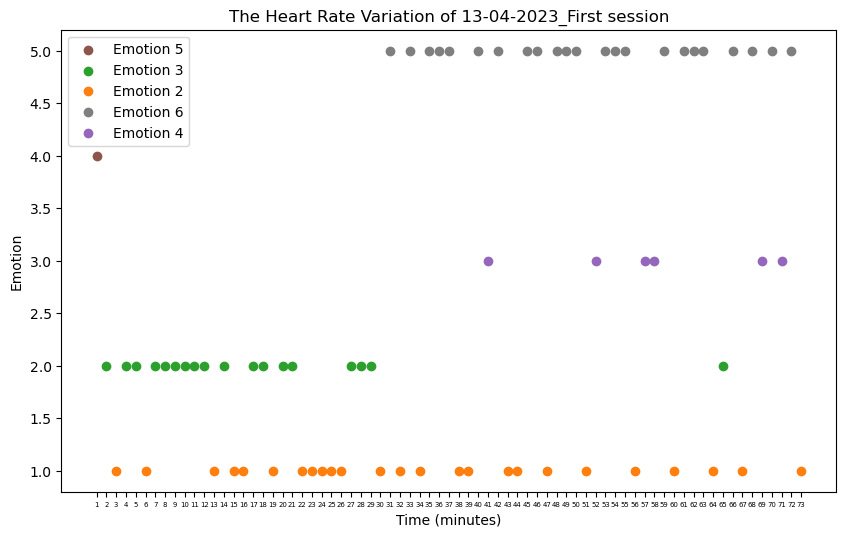

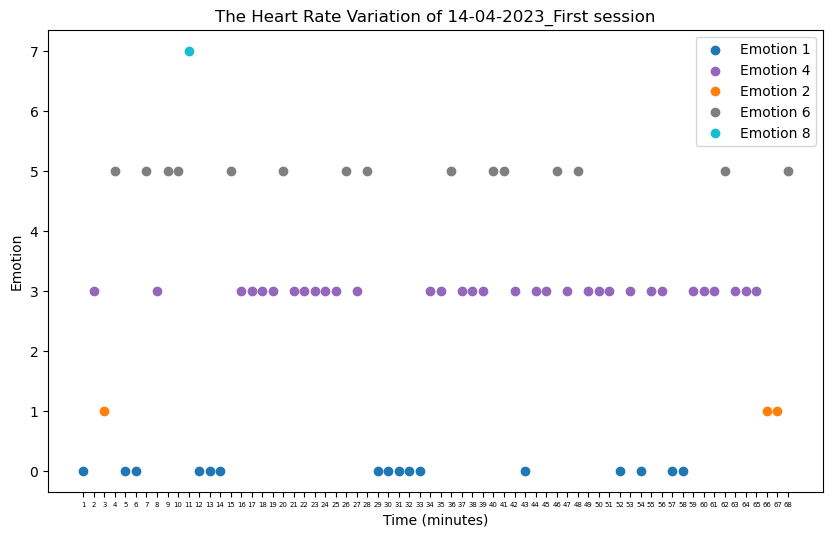

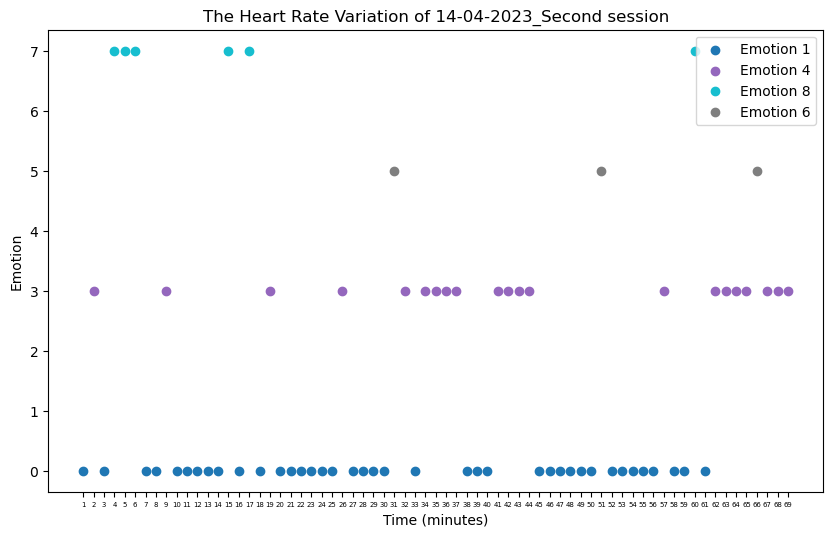

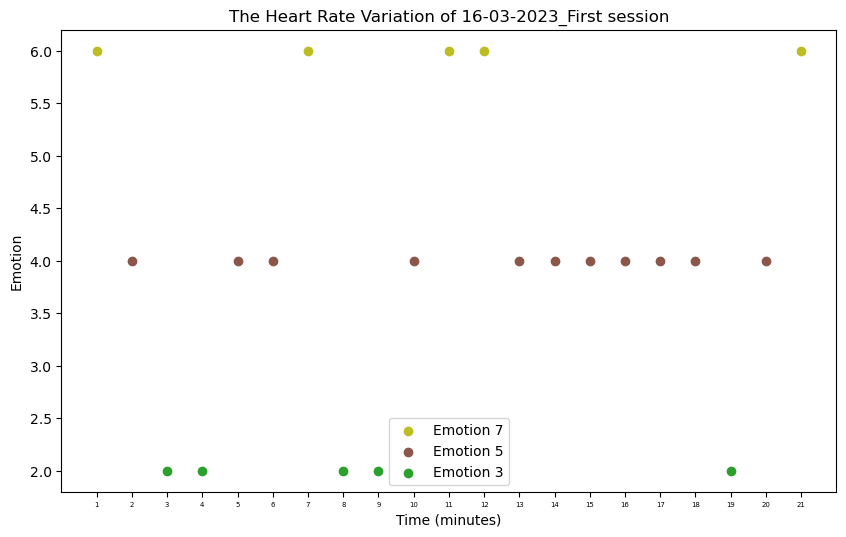

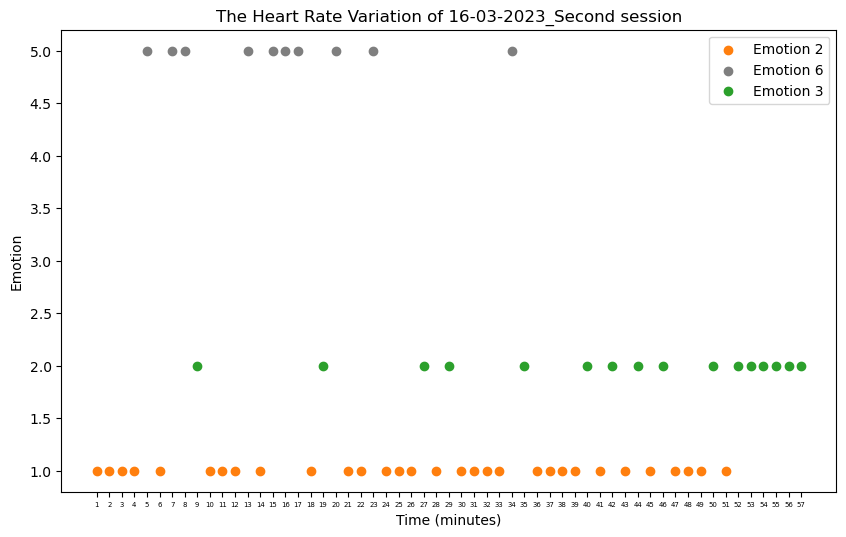

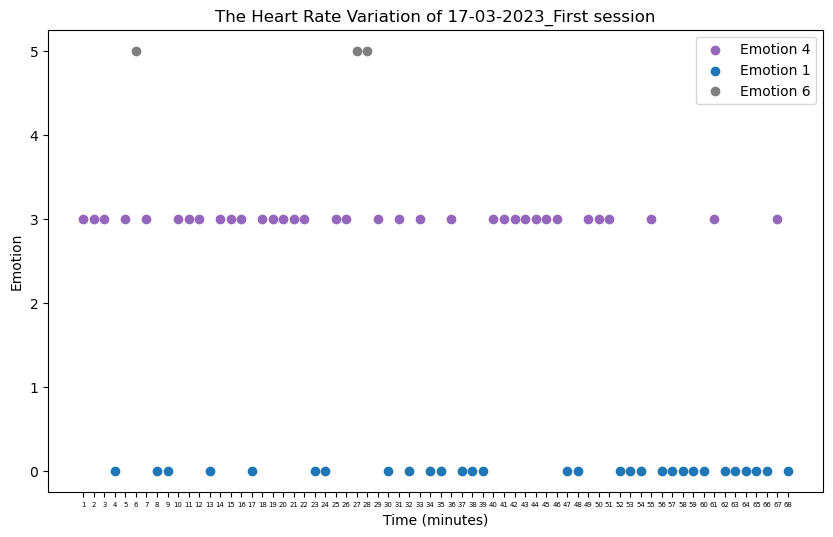

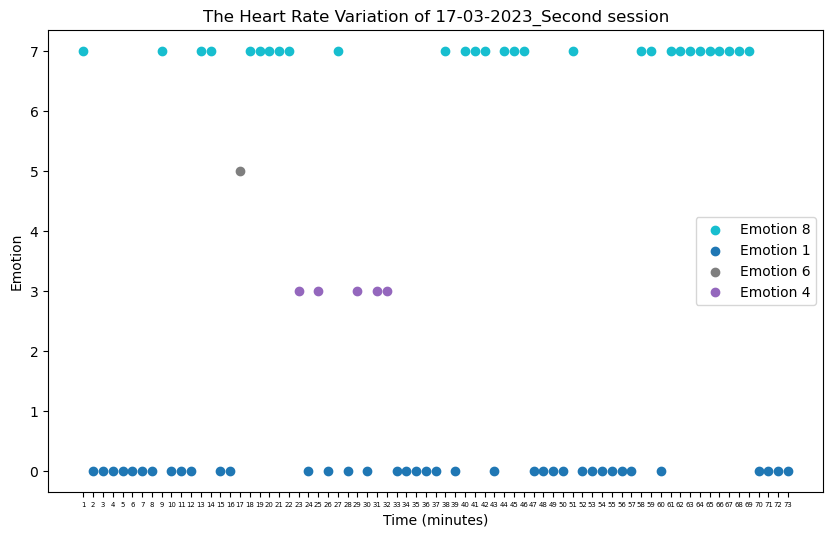

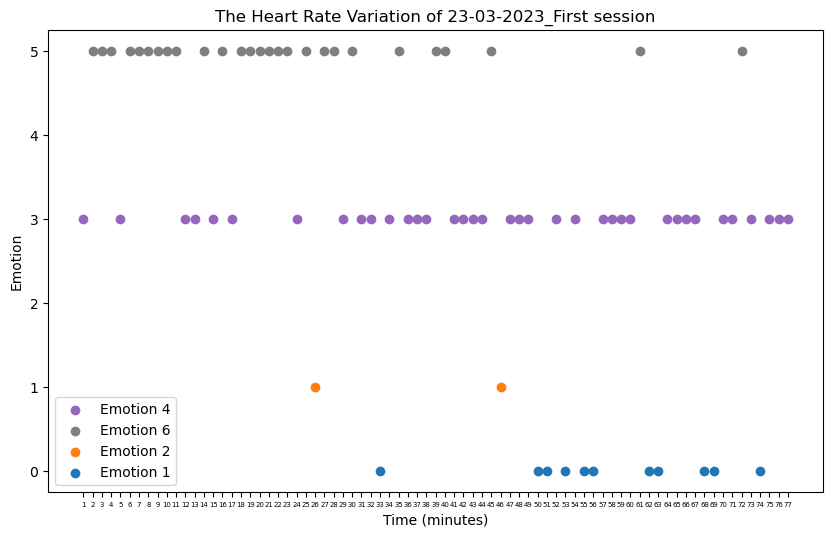

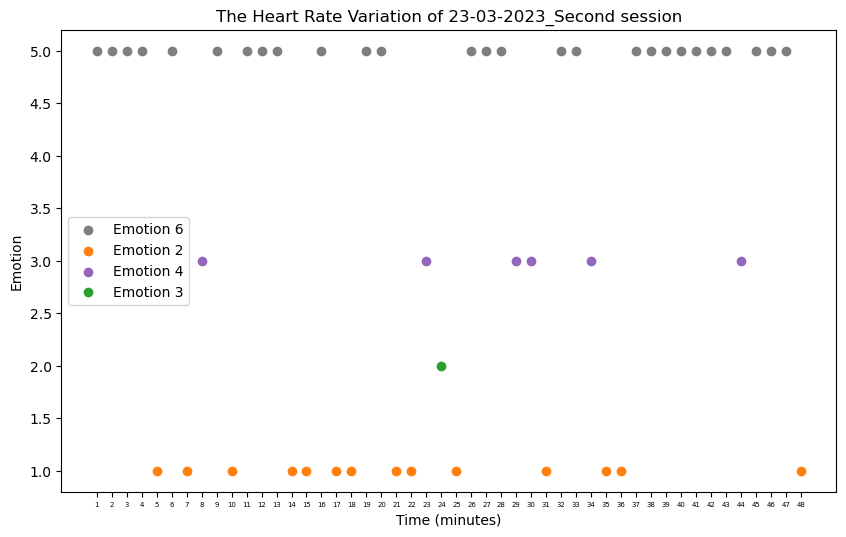

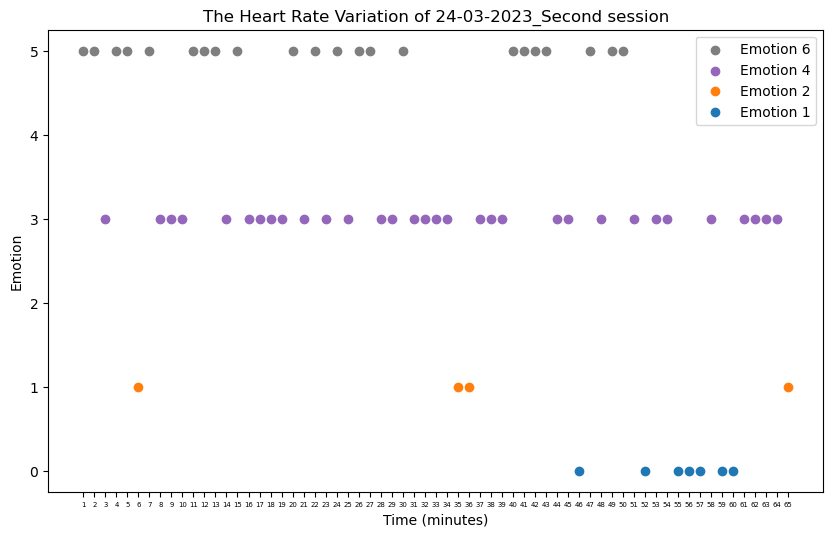

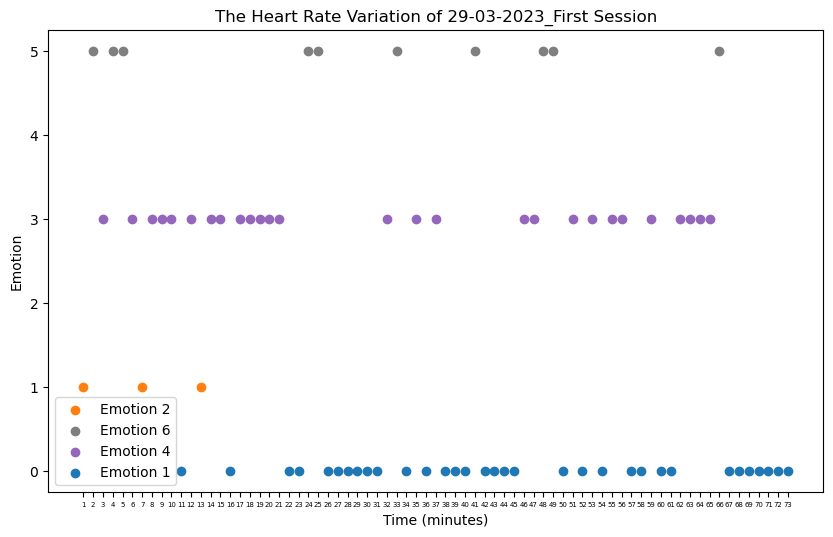

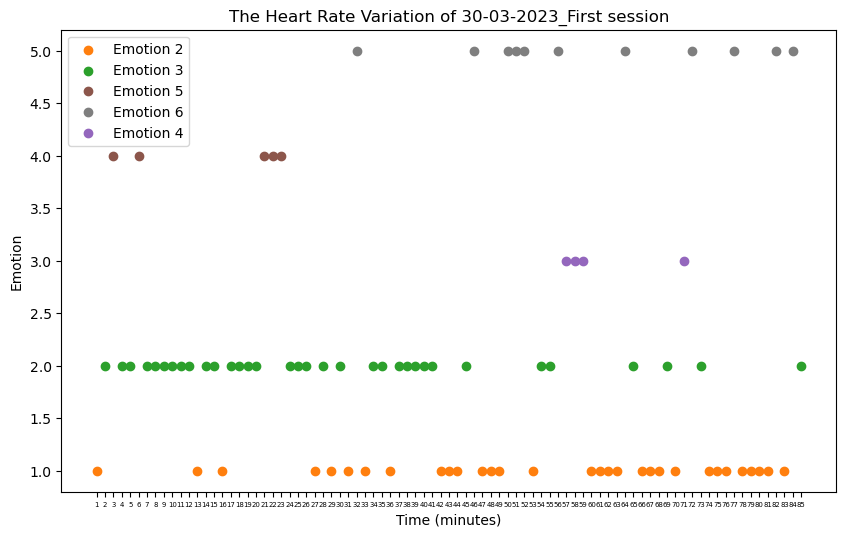

In [22]:
# Determine the number of columns
num_columns = merged_data.shape[1]

# Determine the maximum length of columns
max_length = max(columns_lengths)

# Get unique cluster labels
unique_labels = np.unique(cluster_labels)

# Create a colormap for the clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

# Plotting
plt.figure(figsize=(10, 6))

# Set the x-axis ticks and labels
x_ticks = range(1, max(columns_lengths) + 1)
x_tick_labels = [str(x) for x in x_ticks]

# Create an empty list to store legend handles

# Loop through each number of columns and plot
i = 0
for file_name in os.listdir(root_path):
    label_legend_mapping = {}
    if file_name.endswith('output.xlsx'):
        file_path = os.path.join(root_path,file_name)
        df = pd.read_excel(file_path)
        plt.figure(figsize = (10,6))
        for idx,column in enumerate(df.columns):
            label = cluster_labels[i + idx]
            x = idx + 1
            y = label
            plt.scatter(x,y,color = colors[label])
            if label not in label_legend_mapping:
                label_legend_mapping[label] = plt.scatter([], [], color=colors[label], label=f'Emotion {label+1}')
        
        plt.xticks(np.arange(1,len(df.columns) + 1),fontsize = 5)
        plt.xlabel('Time (minutes)')
#         plt.ylim([60,105])
        plt.ylabel('Emotion')
         # Add a legend using the stored legend handles
        plt.legend(handles=label_legend_mapping.values())
        title = file_name.split('_')[0] + '_' + file_name.split('_')[1]
        plt.title(f'The Heart Rate Variation of {title}')
        output_path = os.path.join('E:\Projet 2023\Data\Cluster',f'{title}.jpg')
        plt.savefig(output_path,bbox_inches='tight',dpi = 300)
        plt.show()
        
        #Update the index
        i += len(df.columns)